<a href="https://colab.research.google.com/github/sumaiya008/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/blob/main/notebooks/1.0_Making_patches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patchify
!pip install Pillow

In [18]:
import tifffile as tiff
from patchify import patchify
from google.colab import drive
from PIL import Image
from PIL import ImageFile
import os
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Increase the limit for image size to suppress DecompressionBombWarning
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = None

In [20]:
!ls "/content/drive/My Drive/Coral Segmentation"

'ML Coral Segmentation 2024'


In [21]:
# Define paths for large images and the target directory on Google Drive
os.chdir('/content/drive/My Drive/Coral Segmentation/ML Coral Segmentation 2024')
image_path = os.listdir()
target_directory = '/content/drive/My Drive/Coral Segmentation/ML Coral Segmentation 2024/patches/'

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)


In [22]:
import os

# Define paths for large images and the target directory
image_path = '/content/drive/My Drive/Coral Segmentation/ML Coral Segmentation 2024/RPN_2015_VHU_0417.png'
mask_path = '/content/drive/My Drive/Coral Segmentation/ML Coral Segmentation 2024/vhu_poci.png'
target_directory = '/content/drive/My Drive/Coral Segmentation/ML Coral Segmentation 2024/patches/'

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Create 'images' and 'masks' directories in the target directory
images_directory = os.path.join(target_directory, 'Image')
masks_directory = os.path.join(target_directory, 'Mask')
os.makedirs(images_directory, exist_ok=True)
os.makedirs(masks_directory, exist_ok=True)

# Create 'vhu_image' and 'vhu_mask' directories in the 'images' and 'masks' directories
vhu_image_directory = os.path.join(images_directory, 'vhu_image')
vhu_mask_directory = os.path.join(masks_directory, 'vhu_mask')
os.makedirs(vhu_image_directory, exist_ok=True)
os.makedirs(vhu_mask_directory, exist_ok=True)


In [23]:
# Load the images
image = Image.open(image_path)
mask = Image.open(mask_path)

# Convert images to NumPy arrays
image_array = np.array(image).astype(np.uint8)
mask_array = np.array(mask).astype(np.uint8)

In [26]:
image.size

(8357, 20876)

In [27]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [24]:
# Define the patch size and overlap
patch_size = (1080, 1080)
overlap = 100

# Calculate the number of patches in both dimensions
num_patches_x = (image.width - patch_size[0]) // (patch_size[0] - overlap) + 1
num_patches_y = (image.height - patch_size[1]) // (patch_size[1] - overlap) + 1

# Loop over patches and save them
for i in range(num_patches_y):
    for j in range(num_patches_x):
        # Calculate the coordinates for cropping
        left = j * (patch_size[0] - overlap)
        upper = i * (patch_size[1] - overlap)
        right = left + patch_size[0]
        lower = upper + patch_size[1]

        # Crop a single patch from the image and mask
        single_patch_img = image.crop((left, upper, right, lower))
        single_patch_mask = mask.crop((left, upper, right, lower))

        # Save the patch as a new PNG image
        patch_filename = os.path.join(vhu_image_directory, f'{os.path.splitext(os.path.basename(image_path))[0]}_{i}_{j}.png')
        single_patch_img.save(patch_filename)

        # Save the mask patch as a new PNG image
        mask_filename = os.path.join(vhu_mask_directory, f'{os.path.splitext(os.path.basename(mask_path))[0]}_{i}_{j}.png')
        single_patch_mask.save(mask_filename)

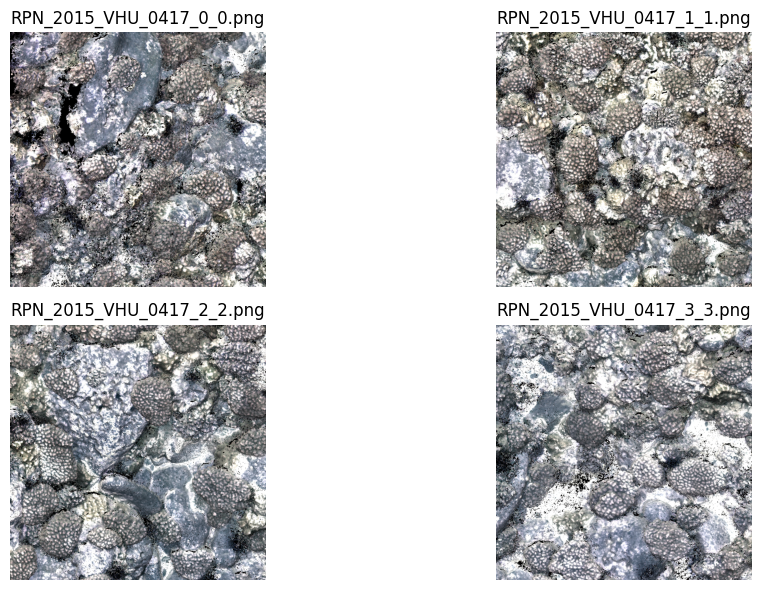

In [25]:
import matplotlib.pyplot as plt

# Display the first few image patches
num_display = 4  # Number of patches to display
fig, axes = plt.subplots(2, num_display // 2, figsize=(12, 6))

for i in range(num_display):
    patch_filename = f'{os.path.splitext(os.path.basename(image_path))[0]}_{i}_{i}.png'
    patch_path = os.path.join(vhu_image_directory, patch_filename)
    patch_img = Image.open(patch_path)
    ax = axes[i // (num_display // 2), i % (num_display // 2)]
    ax.imshow(patch_img)
    ax.axis('off')
    ax.set_title(patch_filename)

plt.tight_layout()
plt.show()


In [14]:
# # Loop over images
# for img_filename in image_path:
#     if img_filename.endswith('.png'):
#         # Open the PNG image using Pillow
#         img = Image.open(img_filename)

#         # Convert the image to a NumPy array
#         img_array = np.array(img)

#         # Define the patch size
#         patch_size = (1080, 1080)

#         # Get the dimensions of the image
#         img_height, img_width = img_array.shape[:2]

#         # Calculate the number of patches in both dimensions
#         num_patches_x = img_width // patch_size[0]
#         num_patches_y = img_height // patch_size[1]

#         # Loop over patches and save them
#         for i in range(num_patches_y):
#             for j in range(num_patches_x):
#                 # Calculate the coordinates for cropping
#                 left = j * patch_size[0]
#                 upper = i * patch_size[1]
#                 right = left + patch_size[0]
#                 lower = upper + patch_size[1]

#                 # Crop a single patch from the image
#                 single_patch_img = img.crop((left, upper, right, lower))

#                 # Save the patch as a new PNG image
#                 patch_filename = f'{target_directory}image_{img_filename}_{i}_{j}.png'
#                 single_patch_img.save(patch_filename)

In [29]:
from patchify import patchify

gather = []
# Assuming 'image' is your PIL Image object
patches = patchify(np.array(image), (1080, 1080, 3), step=100)

In [30]:
patches.shape

(198, 73, 1, 1080, 1080, 3)

In [31]:
for i in range(patches.shape[0]):
  for j in range(patches.shape[1]):
    get_patches = patches[i, j, 0, :, :, :]
    gather.append(get_patches)

In [32]:
len(gather)

14454

In [ ]:
# plt.imshow(image)
# plt.axis('off')

# fig1, ax1 = plt.subplots(nrows=198, ncols=73, figsize = (15, 8))
# a = 0
# for R1 in range(198):
#   for C1 in range(73):
#     ax1[R1, C1].imshow(gather[a])
#     ax1[R1, C1].axis('off')
#     a += 1